In [48]:
import scanpy as sc
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import torch
import numpy as np

In [49]:
adata_nonsmkr = sc.read_text('data/internal_nonsmokerslung.expression.txt', delimiter='\t').T
adata_smkr = sc.read_text('data/internal_smokerslung.expression.txt', delimiter='\t').T

In [50]:
adata_nonsmkr.var_names

Index(['ACE2', 'TMPRSS2', 'IL6R', 'IL6ST', 'PCSK1', 'IL6', 'PCSK2', 'CTSE',
       'MYRF', 'MAG', 'MOG', 'MBP', 'PLP1', 'FURIN', 'PCSK4', 'PCSK5', 'PCSK6',
       'PCSK7', 'C1R', 'C2', 'C3', 'C5', 'CFI', 'CTSS', 'CTSL', 'CTSB',
       'CTSC'],
      dtype='object')

In [51]:
X = adata_nonsmkr.X
# corr_matrix_nonsmkr = np.corrcoef(X, rowvar=False) #pearson correlation
corr_matrix_nonsmkr, spearman_p_vals = spearmanr(X) #spearman correlation
X = adata_smkr.X
# corr_matrix_smkr = np.corrcoef(X, rowvar=False) #pearson correlation
corr_matrix_smkr, spearman_p_vals = spearmanr(X) #spearman correlation

corr_matrix_smkr

array([[ 1.00000000e+00,  5.00454777e-02,  2.51811820e-02,
         3.39153322e-02, -2.71424908e-03,  5.05733189e-03,
         7.48698807e-03,  1.48248897e-03,  3.98810389e-02,
         1.62095072e-04, -2.32415189e-03,  6.41279656e-02,
        -4.95403321e-04,  3.01592816e-02,  1.12629693e-02,
         2.75662037e-02,  1.38196936e-02,  4.07984476e-02,
         9.90450984e-04,  1.85797192e-02,  6.22884204e-02,
         2.03225454e-02,  3.29944145e-02,  6.48223825e-02,
         1.36667456e-02,  7.75633175e-02,  7.96191432e-02],
       [ 5.00454777e-02,  1.00000000e+00,  1.53637648e-01,
         1.77563590e-01, -8.86693904e-03, -2.75376381e-03,
         1.65671952e-01,  1.84972348e-01,  5.00921367e-02,
         1.57389134e-02,  9.35706394e-05,  9.94253720e-02,
        -2.31200809e-03,  1.24174824e-01,  4.58476474e-02,
         3.16434427e-02,  4.02124944e-02, -9.30026926e-03,
         7.25354227e-02,  3.81377426e-01,  3.48145052e-01,
         1.38132968e-01,  2.00752661e-01,  1.51742002e-

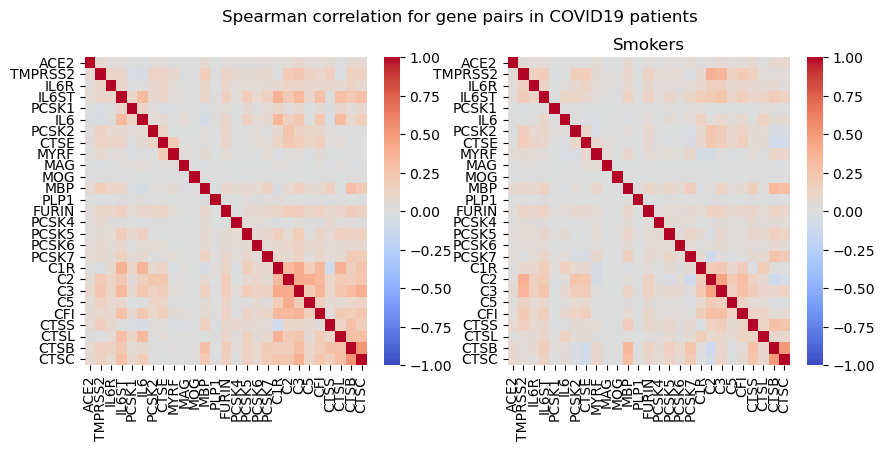

In [56]:
fig, axises = plt.subplots(ncols=2, figsize=(10, 4))
sns.heatmap(corr_matrix_nonsmkr, cmap='coolwarm', vmin=-1, vmax=1, ax=axises[0],
            xticklabels=adata_nonsmkr.var_names, yticklabels=adata_nonsmkr.var_names)
plt.title("Non-smokers")
sns.heatmap(corr_matrix_smkr, cmap='coolwarm', vmin=-1, vmax=1, ax=axises[1],
            xticklabels=adata_smkr.var_names, yticklabels=adata_smkr.var_names)
plt.title("Smokers")
plt.suptitle("Spearman correlation for gene pairs in COVID19 patients", fontsize=12, y=1.0)
plt.show()